In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

In [2]:
df1=pd.read_csv('C:/Users/gacho/Desktop/서예빈/ESS/이전 데이터202106-202110/gcvpp_csv_log_20210630-0930/csv_log/rack_20210630.csv')
df1

,manaDat,devId,grId,rackSoc,rackSoh,dcA,dcV,mode,maxCellV1,maxModVPos1,...,commFaultPos,alarmBit1,alarmBit2,alarmBit3,alarmBit4,faultBit1,faultBit2,faultBit3,faultBit4,Unnamed: 48
0,20210630000000281,211001,211,9.0,100.0,0.0,655.2,0,3.34,0,...,0,0,0,NaN,0,0,0,0,0,NaN
1,20210630000002281,211001,211,9.0,100.0,0.0,655.2,0,3.34,0,...,0,0,0,NaN,0,0,0,0,0,NaN
2,20210630000004282,211001,211,9.0,100.0,0.0,655.2,0,3.34,0,...,0,0,0,NaN,0,0,0,0,0,NaN
3,20210630000006281,211001,211,9.0,100.0,0.0,655.2,0,3.34,0,...,0,0,0,NaN,0,0,0,0,0,NaN
4,20210630000008332,211001,211,9.0,100.0,0.0,655.2,0,3.34,0,...,0,0,0,NaN,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43171,20210630235950036,211001,211,8.0,100.0,0.0,652.0,0,3.32,0,...,0,0,0,NaN,0,0,0,0,0,NaN
43172,20210630235952036,211001,211,8.0,100.0,0.0,652.0,0,3.32,0,...,0,0,0,NaN,0,0,0,0,0,NaN
43173,20210630235954036,211001,211,8.0,100.0,0.0,652.0,0,3.32,0,...,0,0,0,NaN,0,0,0,0,0,NaN
43174,20210630235956037,211001,211,8.0,100.0,0.0,652.0,0,3.32,0,...,0,0,0,NaN,0,0,0,0,0,NaN


## 분 단위로 만들기

In [3]:
soc = []
dcA = []
dcV = []
minTemp = []
maxTemp = []
date = []
for i in range(0,len(df1),30):
    soc += [df1['rackSoc'][i]]
    dcA += [df1['dcA'][i]]
    dcV += [df1['dcV'][i]]
    minTemp += [df1['maxCellT1'][i]]
    maxTemp += [df1['minCellT1'][i]]
    date += [df1['manaDat'][i]]

In [4]:
print(len(soc))
print(len(dcA))
print(len(dcV))
print(len(minTemp))
print(len(maxTemp))
print(len(date))

1440
1440
1440
1440
1440
1440


### 시간 수정

In [5]:
for i in range(len(date)):
    date[i] = str(date[i])[:12]

## 사용할 데이터만 모으기

In [39]:
df2=pd.DataFrame([date,soc,dcA,dcV,minTemp,maxTemp])
df2

,0,1,2,3,4,5,6,7,8,9,...,1430,1431,1432,1433,1434,1435,1436,1437,1438,1439
0,202106300000,202106300001,202106300002,202106300003,202106300004,202106300005,202106300006,202106300007,202106300008,202106300009,...,202106302350,202106302351,202106302352,202106302353,202106302354,202106302355,202106302356,202106302357,202106302358,202106302359
1,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,...,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0
2,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.0,0.0
3,655.2,655.2,655.2,655.2,655.2,655.2,655.2,655.2,655.2,655.2,...,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.0,652.1,652.0
4,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
5,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0


In [40]:
df2=df2.transpose()
df2=df2.rename(columns={0:'date',1:'soc',2:'dcA',3:'dcV',4:'minTemp',5:'maxTemp'})
df2

,date,soc,dcA,dcV,minTemp,maxTemp
0,202106300000,9.0,0.0,655.2,22.0,21.0
1,202106300001,9.0,0.1,655.2,22.0,21.0
2,202106300002,9.0,0.0,655.2,22.0,21.0
3,202106300003,9.0,0.0,655.2,22.0,21.0
4,202106300004,9.0,0.0,655.2,22.0,21.0
...,...,...,...,...,...,...
1435,202106302355,8.0,0.0,652.0,22.0,21.0
1436,202106302356,8.0,0.1,652.0,22.0,21.0
1437,202106302357,8.0,0.0,652.0,22.0,21.0
1438,202106302358,8.0,0.0,652.1,22.0,21.0


In [41]:
df2.index = pd.to_datetime(df2['date'])
df2=df2.drop('date',axis=1)
df2

,soc,dcA,dcV,minTemp,maxTemp
date,,,,,
2021-06-30 00:00:00,9.0,0.0,655.2,22.0,21.0
2021-06-30 00:01:00,9.0,0.1,655.2,22.0,21.0
2021-06-30 00:02:00,9.0,0.0,655.2,22.0,21.0
2021-06-30 00:03:00,9.0,0.0,655.2,22.0,21.0
2021-06-30 00:04:00,9.0,0.0,655.2,22.0,21.0
...,...,...,...,...,...
2021-06-30 23:55:00,8.0,0.0,652.0,22.0,21.0
2021-06-30 23:56:00,8.0,0.1,652.0,22.0,21.0
2021-06-30 23:57:00,8.0,0.0,652.0,22.0,21.0


## 1분간 soc차이

In [42]:
d=[]
for i in range(len(df2['soc'])-1):
    d += [(df2['soc'][i+1]-df2['soc'][i])*119.7]
d+=[0]

# 튀는 값.... 
d[251]=0 #-4
d[289]=0 #-1
d[796]=0 #1.9
d[608]=0 #1.9
d[633]=0 #1
d[697]=0 #-1

print(len(d))
print(d)

1440
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.939999999999916, 35.91000000000009, 35.91000000000009, 35.909999999999876, 35.91000000000009, 35.909999999999876, 35.91000000000009, 35.91000000000009, 35.909999999999876, 35.91000000000009, 35.909999999999876, 35.91000000000009, 35.91000000000009, 35.909999999999876, 35.91000000000009, 35.909999999999876, 23.94000000000013, 35.909999999999876, 35.91000000000009, 35.91000000000009, 35.909

In [43]:
df2['차이*총량']=d
df2

,soc,dcA,dcV,minTemp,maxTemp,차이*총량
date,,,,,,
2021-06-30 00:00:00,9.0,0.0,655.2,22.0,21.0,0.0
2021-06-30 00:01:00,9.0,0.1,655.2,22.0,21.0,0.0
2021-06-30 00:02:00,9.0,0.0,655.2,22.0,21.0,0.0
2021-06-30 00:03:00,9.0,0.0,655.2,22.0,21.0,0.0
2021-06-30 00:04:00,9.0,0.0,655.2,22.0,21.0,0.0
...,...,...,...,...,...,...
2021-06-30 23:55:00,8.0,0.0,652.0,22.0,21.0,0.0
2021-06-30 23:56:00,8.0,0.1,652.0,22.0,21.0,0.0
2021-06-30 23:57:00,8.0,0.0,652.0,22.0,21.0,0.0


## 사용한 전력량

In [44]:
df2['P(kw)']=df2['dcA']*df2['dcV']/1000
df2

,soc,dcA,dcV,minTemp,maxTemp,차이*총량,P(kw)
date,,,,,,,
2021-06-30 00:00:00,9.0,0.0,655.2,22.0,21.0,0.0,0.0
2021-06-30 00:01:00,9.0,0.1,655.2,22.0,21.0,0.0,0.06552
2021-06-30 00:02:00,9.0,0.0,655.2,22.0,21.0,0.0,0.0
2021-06-30 00:03:00,9.0,0.0,655.2,22.0,21.0,0.0,0.0
2021-06-30 00:04:00,9.0,0.0,655.2,22.0,21.0,0.0,0.0
...,...,...,...,...,...,...,...
2021-06-30 23:55:00,8.0,0.0,652.0,22.0,21.0,0.0,0.0
2021-06-30 23:56:00,8.0,0.1,652.0,22.0,21.0,0.0,0.0652
2021-06-30 23:57:00,8.0,0.0,652.0,22.0,21.0,0.0,0.0


## 최소온도 최고온도의 평균

In [45]:
df2['temp'] = (df2['minTemp']+df2['maxTemp']) / 2
df2

,soc,dcA,dcV,minTemp,maxTemp,차이*총량,P(kw),temp
date,,,,,,,,
2021-06-30 00:00:00,9.0,0.0,655.2,22.0,21.0,0.0,0.0,21.5
2021-06-30 00:01:00,9.0,0.1,655.2,22.0,21.0,0.0,0.06552,21.5
2021-06-30 00:02:00,9.0,0.0,655.2,22.0,21.0,0.0,0.0,21.5
2021-06-30 00:03:00,9.0,0.0,655.2,22.0,21.0,0.0,0.0,21.5
2021-06-30 00:04:00,9.0,0.0,655.2,22.0,21.0,0.0,0.0,21.5
...,...,...,...,...,...,...,...,...
2021-06-30 23:55:00,8.0,0.0,652.0,22.0,21.0,0.0,0.0,21.5
2021-06-30 23:56:00,8.0,0.1,652.0,22.0,21.0,0.0,0.0652,21.5
2021-06-30 23:57:00,8.0,0.0,652.0,22.0,21.0,0.0,0.0,21.5


## 사용한 전력량과 실제 충방전량 비교

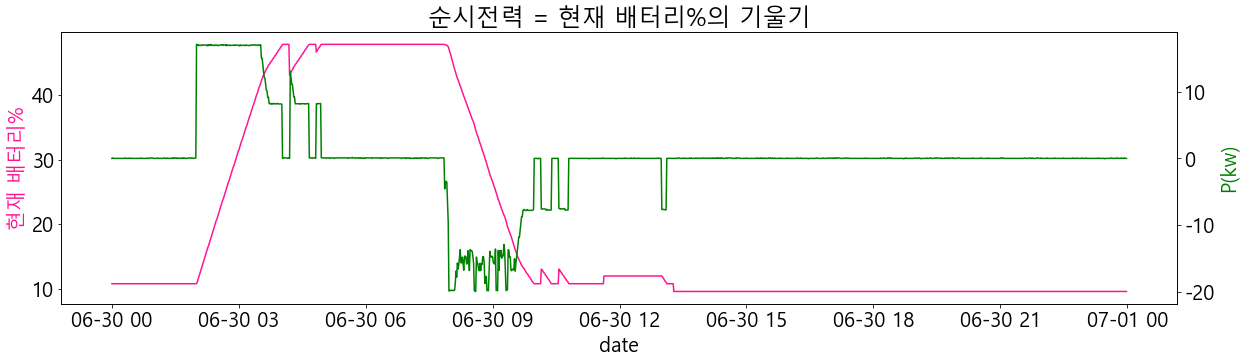

In [46]:
plt.rcParams['figure.figsize'] = (20,5)
plt.rcParams['font.size'] = 20
fig,ax1=plt.subplots()
ax1.set_title('순시전력 = 현재 배터리%의 기울기')
ax1.plot(df2.index,df2['soc']/100*119.7,color='deeppink')
ax1.set_xlabel('date')
ax1.set_ylabel('현재 배터리%',color='deeppink')
ax2=ax1.twinx()
ax2.plot(df2.index,df2['P(kw)'],color='green')
ax2.set_ylabel('P(kw)',color='green')
plt.show()

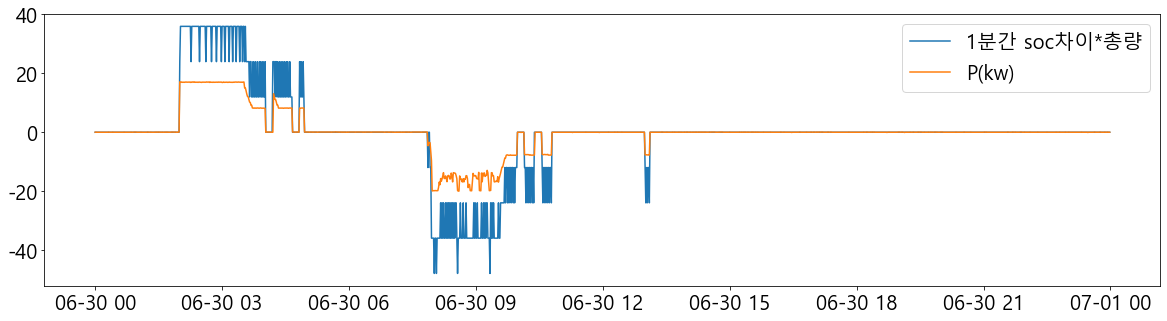

In [47]:
plt.figure(figsize=(20,5))
plt.plot(df2['차이*총량'],label='1분간 soc차이*총량')
plt.plot(df2['P(kw)'],label='P(kw)')
plt.legend()